# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

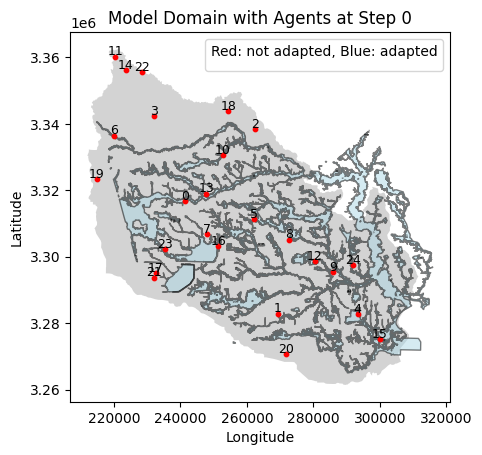

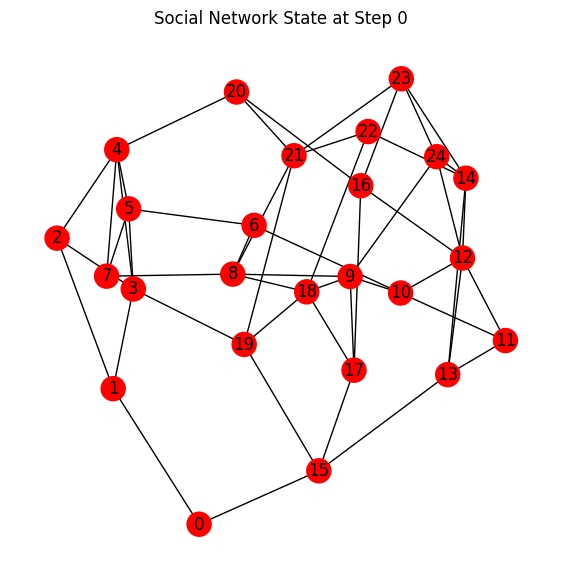

Yeah


<Figure size 1000x600 with 0 Axes>

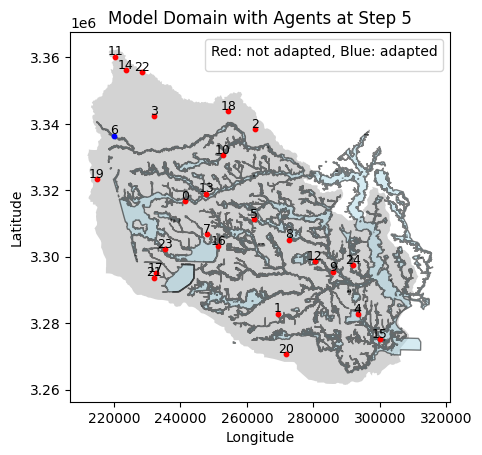

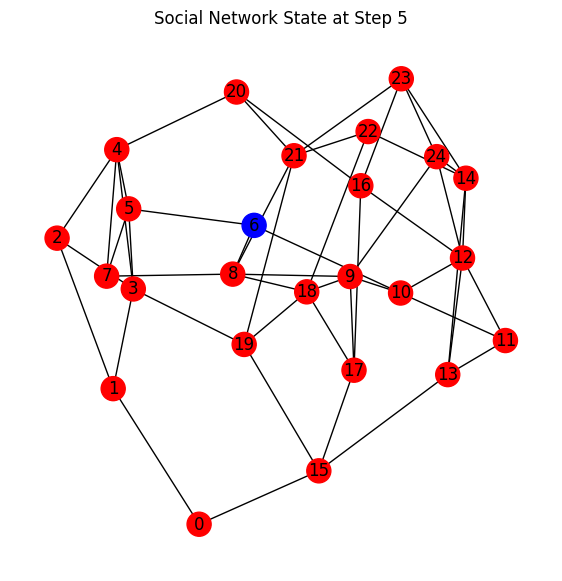

<Figure size 1000x600 with 0 Axes>

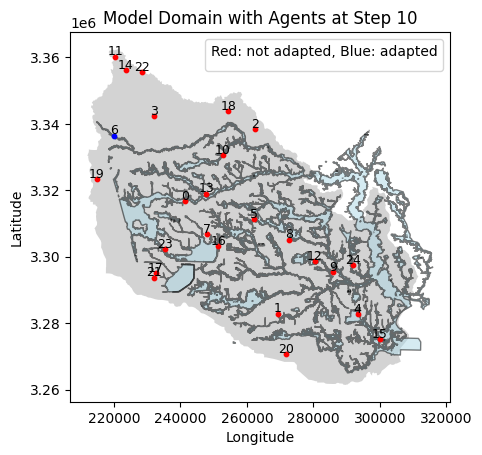

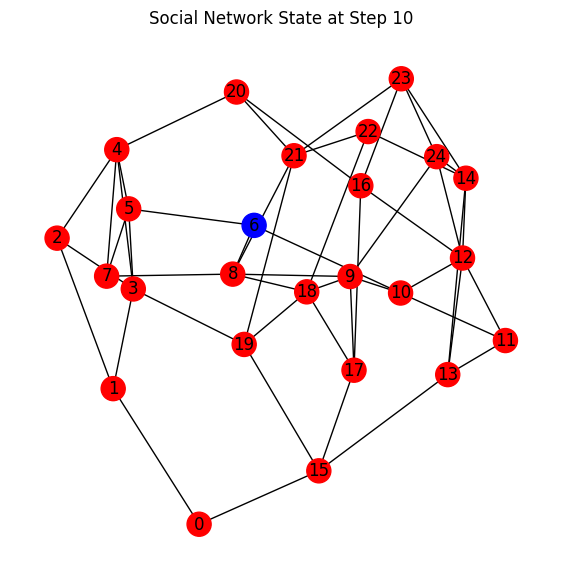

<Figure size 1000x600 with 0 Axes>

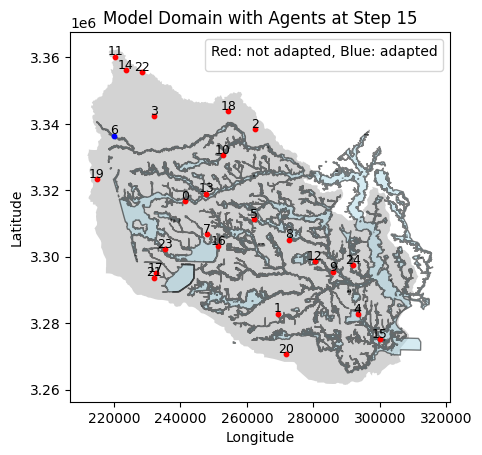

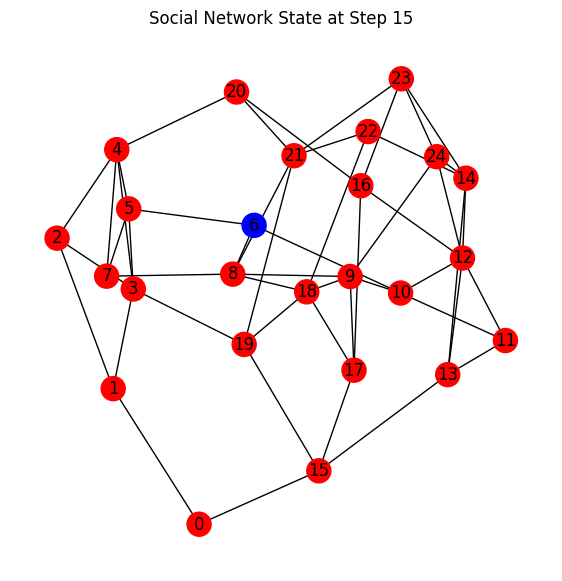

<Figure size 1000x600 with 0 Axes>

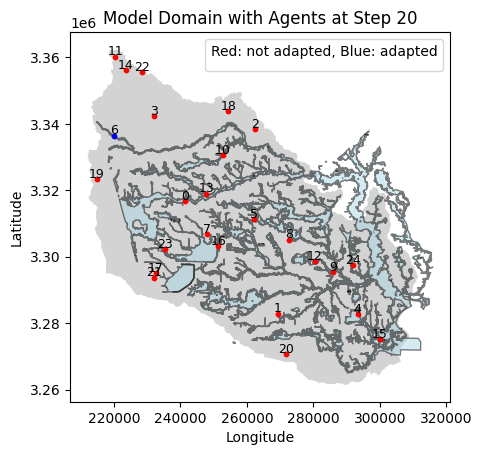

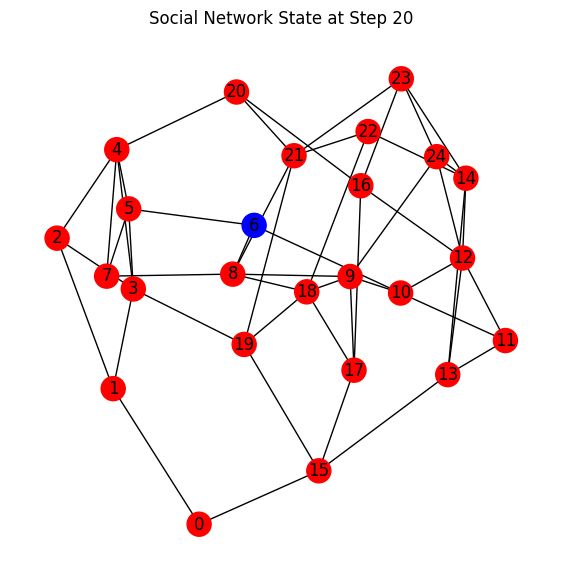

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=25, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   3.196247         144877.857121          0.000000   
     1                   0.218034          69601.286871          0.000000   
     2                   0.000000              0.000000          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   4.015388         207828.020160          0.000000   
...                           ...                   ...               ...   
19   20                  3.137695         138982.905139          2.738404   
     21                  0.743073          52640.334990          0.540368   
     22                  2.731262         100610.598153          2.530167   
     23                  3.459549          72251.948290          3.820375   
     24                  0.811674         123913.181594          0.415167   

              FloodDamageActual  IsAdapted  AdaptationDepth  \
Step AgentID                                                  
0    0                 0.000000      False                0   
     1                 0.000000      False                0   
     2                 0.000000      False                0   
     3                 0.000000      False                0   
     4                 0.000000      False                0   
...                         ...        ...              ...   
19   20           135087.669599      False                0   
     21            47731.741441      False                0   
     22            98979.643521      False                0   
     23            73698.832141      False                0   
     24           100207.675338      False                0   

                                                   location  Income  \
Step AgentID                                                          
0    0        POINT (241351.54038181374 3316753.5771491504)    6423   
     1          POINT (269335.4122408596 3282891.984712348)   37219   
     2        POINT (262335.10012837284 3338413.2628976055)   31197   
     3         POINT (232105.1063123127 3342400.4940865682)   20868   
     4         POINT (293376.66581869277 3282871.501866593)   72654   
...                                                     ...     ...   
19   20       POINT (271707.70535937115 3270607.3500900744)   25040   
     21         POINT (232004.0697014984 3293754.102090042)    5922   
     22        POINT (228326.99165561303 3355576.321810095)   26134   
     23            POINT (235409.0537818035 3302386.904484)    4581   
     24        POINT (291836.43608096003 3297618.137788918)   24801   

               IncomeLabel  OwnFloodPerception  NetworkPerception  
Step AgentID                                                       
0    0        Middle-Class                   1                  0  
     1        Middle-Class                   2                  0  
     2        Middle-Class                   1                  0  
     3        Middle-Class                   3                  0  
     4                Rich                   3                  0  
...                    ...                 ...                ...  
19   20       Middle-Class                   1                  1  
     21               Poor                   1                  1  
     22       Middle-Class                   1                  1  
     23               Poor                   1                  1  
     24       Middle-Class                   1                  1  

[500 rows x 11 columns]

In [5]:
condition = (agent_data['OwnFloodPerception'] == 4)
result_df = agent_data[condition]

result_df[['FloodDamageEstimated','IsAdapted','AdaptationDepth','Income', 'IncomeLabel','NetworkPerception', 'OwnFloodPerception']]


FloodDamageEstimated  IsAdapted  AdaptationDepth  Income  \
Step AgentID                                                             
0    5                80158.322844      False                0   20119   
     9               119125.841430      False                0   13245   
     11                   0.000000      False                0   60372   
     12                   0.000000      False                0   85060   
     21               52640.334990      False                0    5922   
     23               72251.948290      False                0    4581   
1    6               103949.116619       True                1   17088   
     8               222482.958595      False                0  112187   

               IncomeLabel  NetworkPerception  OwnFloodPerception  
Step AgentID                                                       
0    5        Middle-Class                  0                   4  
     9        Middle-Class                  0                   4  
     11               Rich                  0                   4  
     12               Rich                  0                   4  
     21               Poor                  0                   4  
     23               Poor                  0                   4  
1    6        Middle-Class                  4                   4  
     8                Rich                  4                   4

In [4]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
